In [1]:
import mediapipe as mp
print(mp.__version__)
print(hasattr(mp, "solutions"))
print(mp.solutions.hands)

0.10.21
True
<module 'mediapipe.python.solutions.hands' from '/Users/klutetr/Desktop/Projects/finger_follower/venv312/lib/python3.12/site-packages/mediapipe/python/solutions/hands.py'>


In [2]:
import cv2
import mediapipe as mp
import time
import numpy as np

from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [3]:
import sys
import mediapipe as mp

print("Python exe:", sys.executable)
print("mediapipe module:", mp)
print("mediapipe file:", getattr(mp, "__file__", None))
print("has solutions?:", hasattr(mp, "solutions"))
print("top-level attrs sample:", sorted([a for a in dir(mp) if "sol" in a.lower()])[:20])

Python exe: /Users/klutetr/Desktop/Projects/finger_follower/venv312/bin/python
mediapipe module: <module 'mediapipe' from '/Users/klutetr/Desktop/Projects/finger_follower/venv312/lib/python3.12/site-packages/mediapipe/__init__.py'>
mediapipe file: /Users/klutetr/Desktop/Projects/finger_follower/venv312/lib/python3.12/site-packages/mediapipe/__init__.py
has solutions?: True
top-level attrs sample: ['solutions']


In [4]:
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("Could not open webcam. Try restarting Jupyter or check macOS camera permission.")

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    model_complexity=1,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6
)

print("Initialized webcam + MediaPipe Hands")

Initialized webcam + MediaPipe Hands


I0000 00:00:1766459694.167837 97974523 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M2


In [5]:
class Smoother:
    def __init__(self, alpha = 0.75):
        self.alpha = alpha
        self.x = None
        self.y = None

    def update(self, x, y):
        if self.x is None:
            self.x, self.y = x, y
        else:
            self.x = int(self.alpha * self.x + (1 - self.alpha) * x)
            self.y = int(self.alpha * self.y + (1 - self.alpha) * y)
        return self.x, self.y

smoother = Smoother(alpha = 0.75)
TIP_ID = 8  # index fingertip

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1766459694.187132 97975063 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766459694.196120 97975063 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


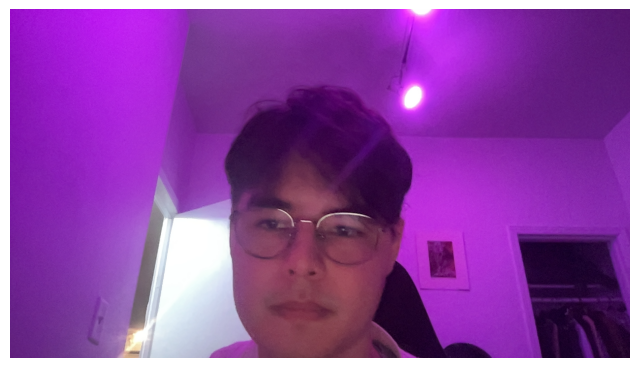

In [ ]:
plt.figure(figsize=(8, 6))

for _ in range(300):
    ok, frame = cap.read()
    if not ok:
        print("Failed to read frame")
        break

    frame = cv2.flip(frame, 1) #mirror
    h, w = frame.shape[:2]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb)

    if result.multi_hand_landmarks:
        hand_landmarks = result.multi_hand_landmarks[0]

        tip = hand_landmarks.landmark[TIP_ID]
        x = int(tip.x * w)
        y = int(tip.y * h)

        sx, sy = smoother.update(x, y)

        #Draw a dot on the RGB image (green)
        cv2.circle(rgb, (sx, sy), 18, (0, 255, 0), -1)

        #draw hand skeleton for debugging
        mp_draw.draw_landmarks(rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    clear_output(wait=True)
    plt.imshow(rgb)
    plt.axis("off")
    display(plt.gcf())

In [8]:
cap.release()
hands.close()
print("Released camera + closed MediaPipe")

Released camera + closed MediaPipe
